**MNIST Handwritten Digit Classification using Deep Learning (Neural Network)**

Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets

In [2]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# here we check if it is already numpy array or not
type(x_train)

numpy.ndarray

In [4]:
# this to see the shape, for x_train 60000 is number of imgs, 28x28 is the size of the imgs
print(x_train.shape, y_train.shape , x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
#I was wondering how it look like so I printed the first element
print(x_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 19

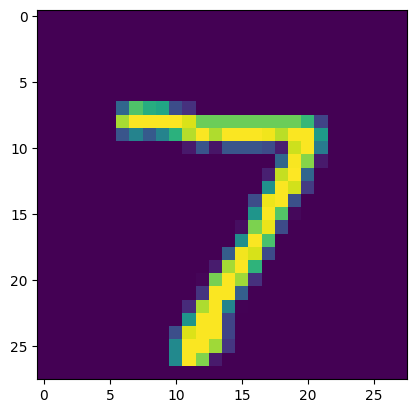

In [6]:
# I want to see what it the img behind the first element
plt.imshow(x_test[0])

In [7]:
#unique values in Y_train
print(np.unique(y_train))

#unique values in Y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these labels as such or we can also apply OneHotEncoding

All the images have the smae dimensions in this dataset, if not , we have to resize all the images to a common dimension

In [8]:
# scaling the values to be between 0 and 1

x_train = x_train/255
x_test = x_test/255

In [9]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [10]:
# setting up the layers of the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# compile the NN
model.compile(optimizer='Adam', #determine the most optimum model parameters
              loss='sparse_categorical_crossentropy',#
              metrics=['accuracy'])

In [12]:
#training the NN
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8454 - loss: 0.5231
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9531 - loss: 0.1559
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9669 - loss: 0.1092
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9743 - loss: 0.0844
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9796 - loss: 0.0687
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9840 - loss: 0.0565
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9858 - loss: 0.0476
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9880 - loss: 0.0400
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9892 - loss: 0.0352
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9901 - loss: 0.0319


Training data accuracy 98.9%

**Accuracy on Test data:**

In [13]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9660 - loss: 0.1390
0.9699000120162964


Test data accuracy 96.6%

In [14]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
y_pred.shape

(10000, 10)

In [16]:
print(y_pred[0])

[3.9458768e-03 8.2829763e-04 6.3608430e-02 9.3324476e-01 4.1493760e-08
 1.2376908e-02 1.7360774e-11 9.9998033e-01 8.2984023e-02 9.6866077e-01]


In [17]:
y_pred_label = [np.argmax(x) for x in y_pred]
y_pred_label[0]

7

Confusin Matrix

In [18]:
conf_mat = confusion_matrix(y_test, y_pred_label)

In [19]:
print(conf_mat)

tf.Tensor(
[[ 960    0    1    2    1    2    7    0    1    6]
 [   0 1111    4    5    1    0    6    1    7    0]
 [   8    0  996   13    4    1    3    3    4    0]
 [   0    0    2  999    0    3    0    2    3    1]
 [   0    0    1    1  970    0    2    2    1    5]
 [   3    0    0   13    3  856    7    3    4    3]
 [   5    2    0    1    5    1  944    0    0    0]
 [   3    3   10   10    2    0    0  988    2   10]
 [   1    1    2   20    2   11    4    1  927    5]
 [   0    3    0   11   28    6    0    5    6  950]], shape=(10, 10), dtype=int32)


Text(0.5, 23.52222222222222, 'Predicted labels')

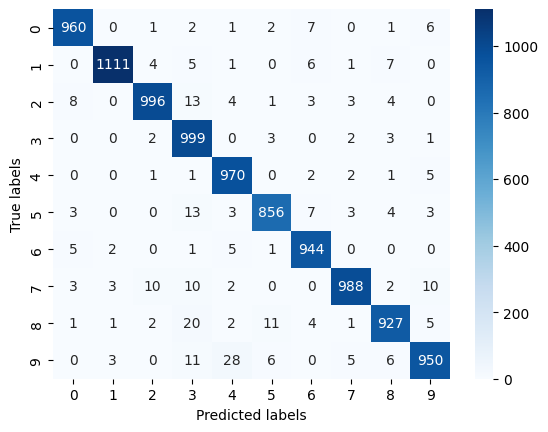

In [20]:
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

**Building a Predictive System**

In [24]:
img_path = '/content/number.png'
input_img = cv2.imread(img_path)

In [25]:
type(input_img)

numpy.ndarray

In [26]:
input_img.shape

(176, 176, 3)

**Gray**

In [27]:
# it is RGB, so we have to make it Gray
gray_img = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

In [28]:
gray_img.shape

(176, 176)

**Resize**

In [29]:
input_img_resized = cv2.resize(gray_img, (28,28))

In [30]:
input_img_resized.shape

(28, 28)

In [31]:
cv2_imshow(input_img_resized)

**Standarize**

In [32]:
input_img_resized = input_img_resized/255

In [33]:
img_reshaped = np.reshape(input_img_resized, [1, 28, 28]) # because we are predicting for only one data point

In [34]:
input_prediction = model.predict(img_reshaped)
input_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[3.0487100e-09, 1.4571521e-04, 2.1471695e-05, 1.0000000e+00,
        6.3151338e-11, 3.3582721e-02, 9.8433498e-16, 7.0462113e-07,
        1.2018946e-02, 6.7865539e-01]], dtype=float32)

In [35]:
input_pred_label = np.argmax(input_prediction)
input_pred_label

3

**Predictive System**

Enter path of the Image to be predicted: /content/number.png


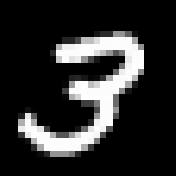

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
The Handwritten Digit is recognised as  3


In [36]:
img_path = input('Enter path of the Image to be predicted: ')
input_img = cv2.imread(img_path)
cv2_imshow(input_img)

gray_img = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

input_img_resized = cv2.resize(gray_img, (28,28))

input_img_resized = input_img_resized/255

img_reshaped = np.reshape(input_img_resized, [1, 28, 28])

input_prediction = model.predict(img_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ',input_pred_label)